In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation

C:\Users\ashle\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
fulldata = pd.read_csv('shotData.csv',usecols=range(0,7)+range(8,130))
intervals=[600,1200,1800,2400,3000,3600,4200,4800,5400]

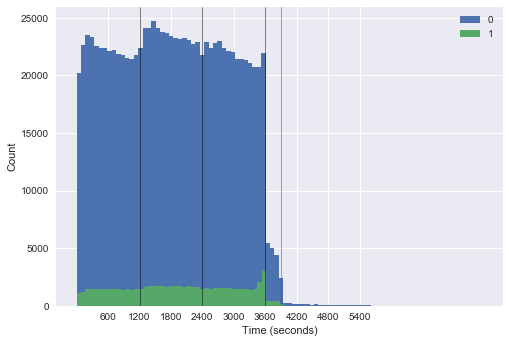

In [3]:
fulldata.groupby('goal')['time'].plot(kind='hist',bins=92, xticks=intervals, legend=True)
plt.ylabel('Count')
plt.xlabel('Time (seconds)')
plt.axvline(x=1200, color='black', lw=0.5)
plt.axvline(x=2400, color='black',lw=0.5)
plt.axvline(x=3600, color='black',lw=0.5)
plt.axvline(x=3900, color='red',lw=0.5)
plt.show()
plt.savefig('1.png')

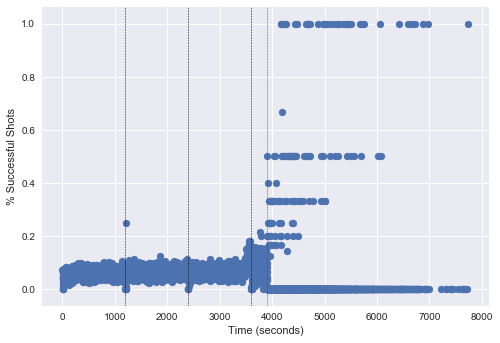

In [4]:
sum_subset = fulldata.groupby('time').sum()
count_subset = fulldata.groupby('time').count()
avg= sum_subset['goal']/count_subset['goal']
#avg.plot(kind='hist',xticks=intervals,bins=20)
plt.scatter(avg.index, avg)
plt.ylabel('% Successful Shots')
plt.xlabel('Time (seconds)')
plt.axvline(x=1200, color='black', lw=0.5, linestyle='dashed')
plt.axvline(x=2400, color='black',lw=0.5, linestyle='dashed')
plt.axvline(x=3600, color='black',lw=0.5, linestyle='dashed')
plt.axvline(x=3900, color='red',lw=0.5, linestyle='dashed')
plt.show()

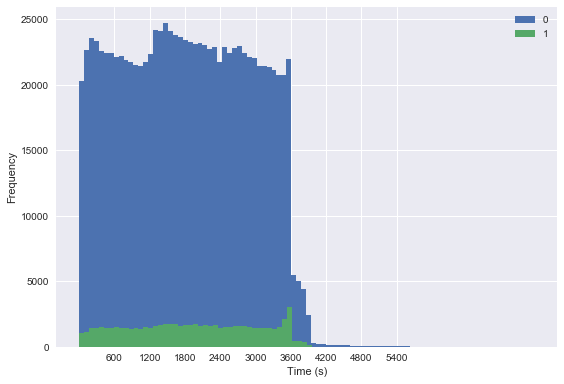

In [5]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Count')
fulldata.groupby('goal')['time'].plot(kind='hist',bins=92, xticks=intervals, legend=True)


#ax2 = ax1.twinx()
#ax2.plot(avg.index, avg, 'r')
#ax2.set_ylabel('% Successful Shots')

fig.tight_layout()
plt.show()

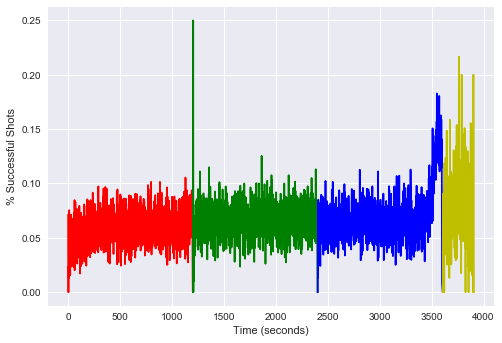

In [6]:
plt.plot(avg.index[0:1200], avg[0:1200],'r')
plt.plot(avg.index[1200:2400], avg[1200:2400],'g')
plt.plot(avg.index[2400:3600], avg[2400:3600],'b')
plt.plot(avg.index[3600:3900], avg[3600:3900],'y')
plt.ylabel('% Successful Shots')
plt.xlabel('Time (seconds)')
plt.show()

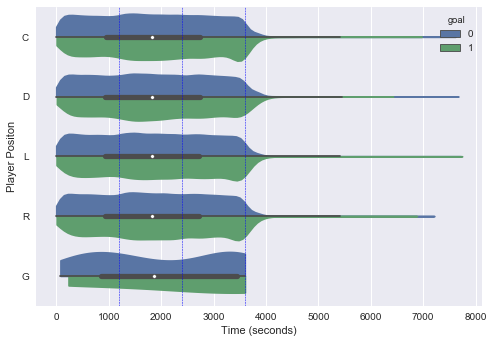

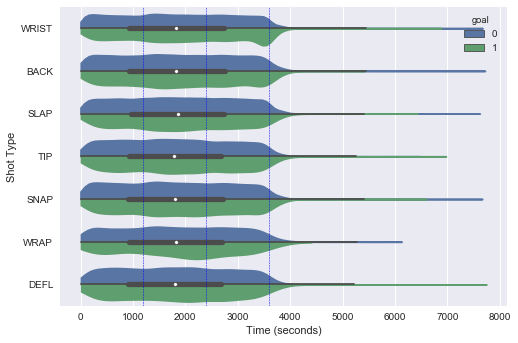

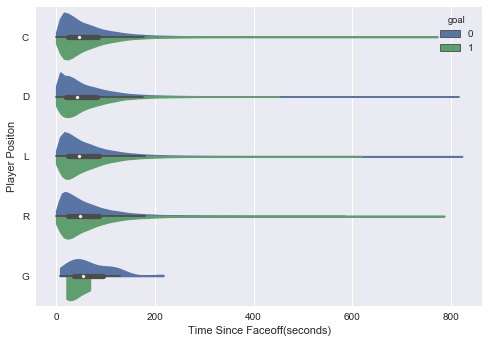

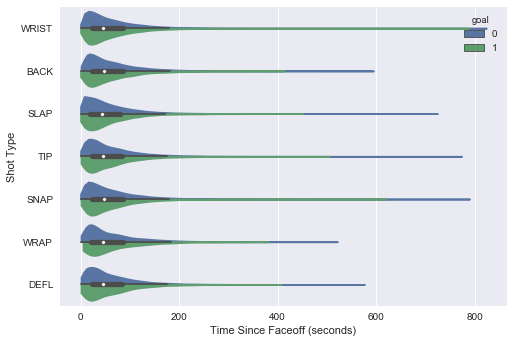

In [7]:
sb.violinplot(x="time", y="playerPositionThatDidEvent", hue="goal", data=fulldata,cut=0, split=True)
plt.axvline(x=1200, color='b', lw=0.5, linestyle='dashed')
plt.axvline(x=2400, color='b',lw=0.5, linestyle='dashed')
plt.axvline(x=3600, color='b',lw=0.5, linestyle='dashed')
plt.ylabel('Player Positon')
plt.xlabel('Time (seconds)')
plt.show()

sb.violinplot(x="time", y="shotType", hue="goal", data=fulldata,cut=0,  split=True)
plt.axvline(x=1200, color='b', lw=0.5, linestyle='dashed')
plt.axvline(x=2400, color='b',lw=0.5, linestyle='dashed')
plt.axvline(x=3600, color='b',lw=0.5, linestyle='dashed')
plt.ylabel('Shot Type')
plt.xlabel('Time (seconds)')
plt.show()

sb.violinplot(x="timeSinceFaceoff", y="playerPositionThatDidEvent", hue="goal", data=fulldata,cut=0, split=True)
plt.ylabel('Player Positon')
plt.xlabel('Time Since Faceoff(seconds)')
plt.show()

sb.violinplot(x="timeSinceFaceoff", y="shotType", hue="goal", data=fulldata,cut=0,  split=True)
plt.ylabel('Shot Type')
plt.xlabel('Time Since Faceoff (seconds)')
plt.show()

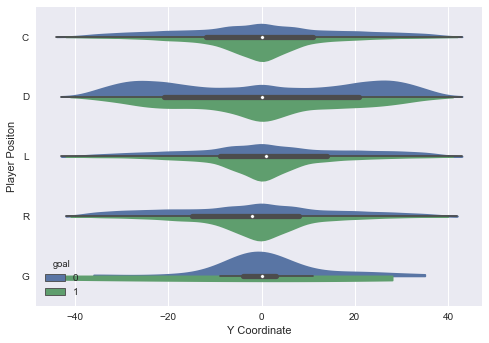

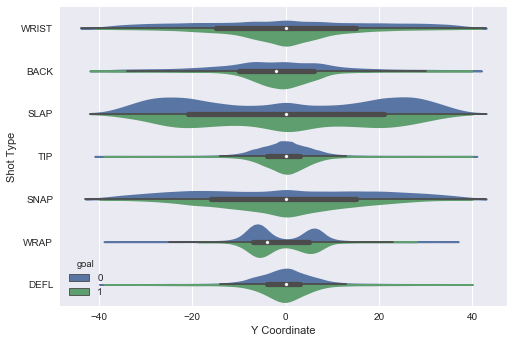

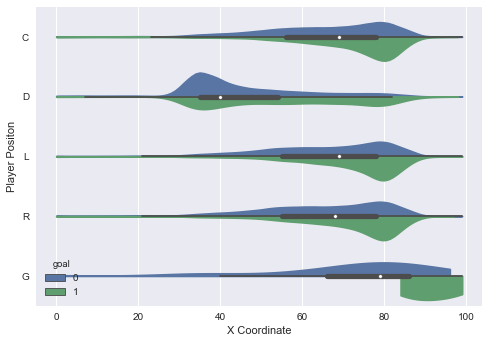

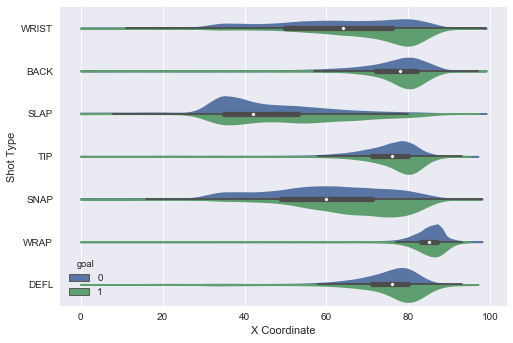

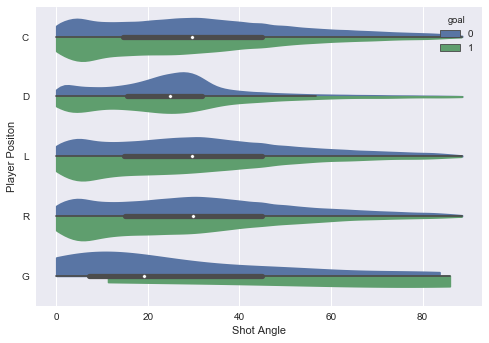

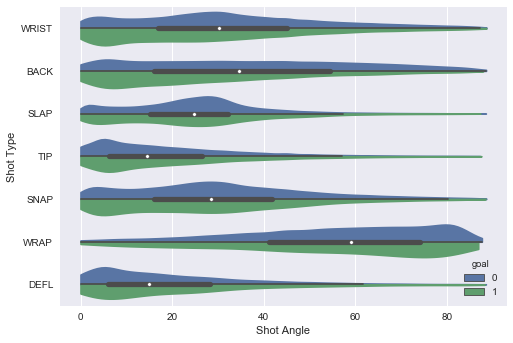

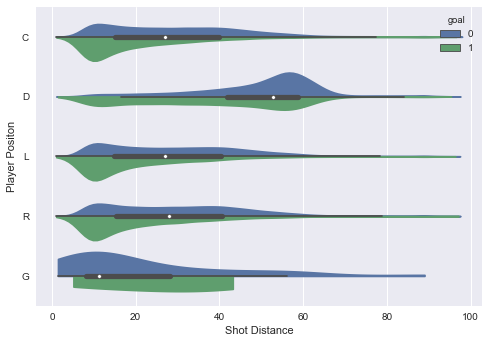

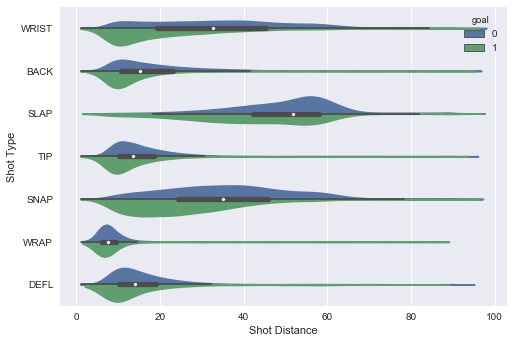

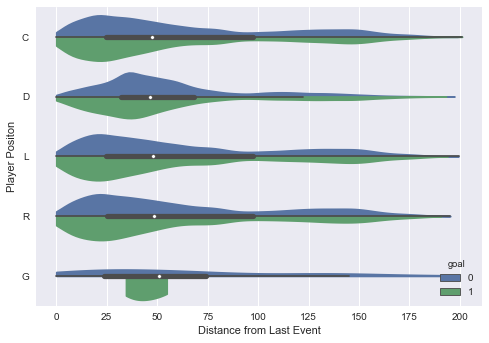

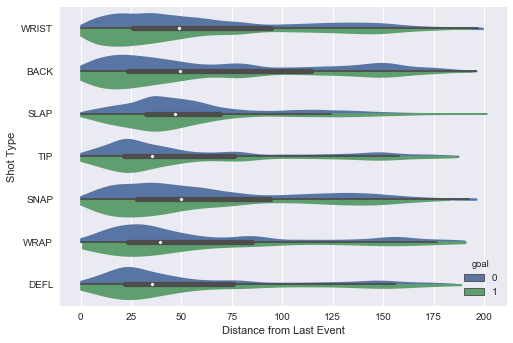

In [8]:
sb.violinplot(x="yCordAdjusted", y="playerPositionThatDidEvent", hue="goal", data=fulldata,cut=0, split=True)
plt.ylabel('Player Positon')
plt.xlabel('Y Coordinate')
plt.show()

sb.violinplot(x="yCordAdjusted", y="shotType", hue="goal", data=fulldata,cut=0, split=True)
plt.ylabel('Shot Type')
plt.xlabel('Y Coordinate')
plt.show()

sb.violinplot(x="xCordAdjusted", y="playerPositionThatDidEvent", hue="goal", data=fulldata,cut=0, split=True)
plt.ylabel('Player Positon')
plt.xlabel('X Coordinate')
plt.show()

sb.violinplot(x="xCordAdjusted", y="shotType", hue="goal", data=fulldata,cut=0, split=True)
plt.ylabel('Shot Type')
plt.xlabel('X Coordinate')
plt.show()

sb.violinplot(x="shotAngleAdjusted", y="playerPositionThatDidEvent", hue="goal", data=fulldata,cut=0, split=True)
plt.ylabel('Player Positon')
plt.xlabel('Shot Angle')
plt.show()

sb.violinplot(x="shotAngleAdjusted", y="shotType", hue="goal", data=fulldata,cut=0, split=True)
plt.ylabel('Shot Type')
plt.xlabel('Shot Angle')
plt.show()

sb.violinplot(x="shotDistance", y="playerPositionThatDidEvent", hue="goal", data=fulldata,cut=0, split=True)
plt.ylabel('Player Positon')
plt.xlabel('Shot Distance')
plt.show()

sb.violinplot(x="shotDistance", y="shotType", hue="goal", data=fulldata,cut=0, split=True)
plt.ylabel('Shot Type')
plt.xlabel('Shot Distance')
plt.show()

sb.violinplot(x="distanceFromLastEvent", y="playerPositionThatDidEvent", hue="goal", data=fulldata,cut=0, split=True)
plt.ylabel('Player Positon')
plt.xlabel('Distance from Last Event')
plt.show()

sb.violinplot(x="distanceFromLastEvent", y="shotType", hue="goal", data=fulldata,cut=0, split=True)
plt.ylabel('Shot Type')
plt.xlabel('Distance from Last Event')
plt.show()

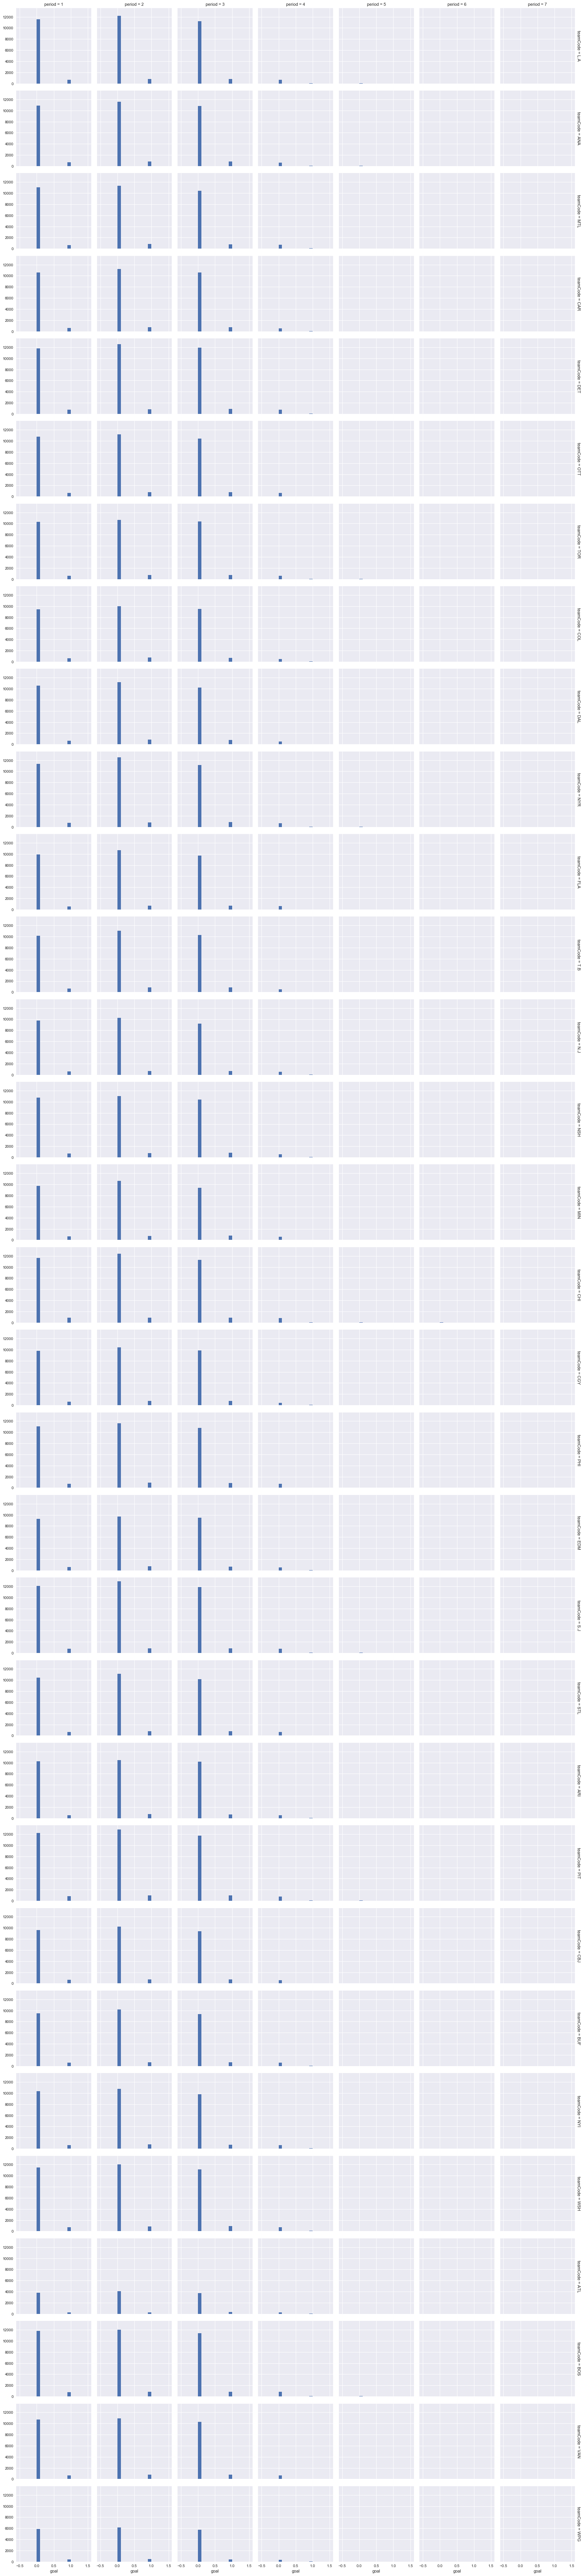

In [9]:
g = sb.FacetGrid(fulldata, row='teamCode', col='period',margin_titles=True)
g.map(plt.hist, 'goal')
plt.show()

In [21]:
traincols= fulldata.iloc[:,range(18,33)]
predictcols= fulldata.iloc[:,17]

In [22]:
logreg = LogisticRegression()
predicted = cross_validation.cross_val_predict(logreg, traincols,predictcols, cv=3)
print 'Logistic Regression: '+str(metrics.accuracy_score(predictcols, predicted))

Logistic Regression: 0.938525433842
